In [73]:
import finlab
from finlab import data
import pandas as pd
import datetime as dt
import numpy as np
import math
from dotenv import load_dotenv
import os
import time
from finlab.backtest import sim
import scipy.stats as stats
import matplotlib.pyplot as plt
def config():
    load_dotenv()


    
config()

finlab.login(str(os.getenv('FINLAB_API')))

輸入成功!


In [10]:
adj_price = data.get('etl:adj_close')

Daily usage: 320.5 / 500 MB - etl:adj_close


In [6]:

adj_price = data.get('etl:adj_close')
inventory = data.get('inventory')

Daily usage: 288.4 / 500 MB - etl:adj_close


ConnectionError: ('Connection aborted.', OSError(22, 'Invalid argument'))

In [44]:
inventory.info()

<class 'finlab.dataframe.FinlabDataFrame'>
RangeIndex: 8899600 entries, 0 to 8899599
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   stock_id  object        
 1   date      datetime64[ns]
 2   持股分級      object        
 3   人數        int64         
 4   持有股數      int64         
 5   占集保庫存數比例  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 407.4+ MB


In [59]:
"""
持股分級:
{1:'1-999',2:'1,000-5,000',3:'5,001-10,000',
4:'10,001-15,000',5:'15,001-20,000',6:'20,001-30,000',
7:'30,001-40,000',8:'40,001-50,000',9:'50,001-100,000',
10:'100,001-200,000',11:'200,001-400,000',12:'400,001-600,000',
13:'600,001-800,000',14:'800,001-1,000,000',15:'1,000,001以上',17:'合計'}

"""

inventory
modified_inventory = inventory.set_index(['date', 'stock_id'])
modified_inventory['持股分級']= modified_inventory['持股分級'].astype(int)
modified_inventory =modified_inventory[(modified_inventory['持股分級'] > 13) & (modified_inventory['持股分級'] < 17)]
#using square to increase the significance of 持股分級
#modified_inventory['持股分級'] = modified_inventory['持股分級'] **2

#using times 100 (X100) to increase the significance of 持股分級
#modified_inventory['持股分級'] = modified_inventory['持股分級'] *100
modified_inventory.info()

<class 'finlab.dataframe.FinlabDataFrame'>
MultiIndex: 1112450 entries, (Timestamp('2016-11-04 00:00:00'), '0050') to (Timestamp('2020-12-31 00:00:00'), '9965')
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   持股分級      1112450 non-null  int64  
 1   人數        1112450 non-null  int64  
 2   持有股數      1112450 non-null  int64  
 3   占集保庫存數比例  1112450 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.4+ MB


In [61]:
modified_inventory

持股分級  人數       持有股數  占集保庫存數比例
date       stock_id                               
2016-11-04 0050        14   3    2782000      0.47
           0050        15  46  423873000     71.66
2016-11-11 0050        14   2    1925000      0.32
           0050        15  46  420532000     71.09
2016-11-18 0050        14   4    3637000      0.59
...                   ...  ..        ...       ...
2020-12-18 9965        15   0          0      0.00
2020-12-25 9965        14   0          0      0.00
           9965        15   0          0      0.00
2020-12-31 9965        14   0          0      0.00
           9965        15   0          0      0.00

[1112450 rows x 4 columns]

In [63]:
# Define thresholds for identifying large holdings
#shares_threshold = 10000000  # Example threshold for '持有股數'
proportion_threshold = 10  # Example threshold for '占集保庫存數比例' in percentage
holding_level_threshold = 12
# Filter for rows where either '持有股數' or '占集保庫存數比例' exceed the thresholds
big_whales = modified_inventory[#(modified_inventory['持有股數'] >= shares_threshold) |
                           (modified_inventory['占集保庫存數比例'] >= proportion_threshold) |
                           (modified_inventory['持股分級'] > holding_level_threshold)]
big_whales

持股分級  人數       持有股數  占集保庫存數比例
date       stock_id                               
2016-11-04 0050        14   3    2782000      0.47
           0050        15  46  423873000     71.66
2016-11-11 0050        14   2    1925000      0.32
           0050        15  46  420532000     71.09
2016-11-18 0050        14   4    3637000      0.59
...                   ...  ..        ...       ...
2020-12-18 9965        15   0          0      0.00
2020-12-25 9965        14   0          0      0.00
           9965        15   0          0      0.00
2020-12-31 9965        14   0          0      0.00
           9965        15   0          0      0.00

[1112450 rows x 4 columns]

ConversionError: Failed to convert value(s) to axis units: MultiIndex([('2020-04-10', '2330'),
            ('2020-04-17', '2330'),
            ('2020-04-24', '2330'),
            ('2020-04-30', '2330'),
            ('2020-05-08', '2330'),
            ('2020-05-15', '2330'),
            ('2020-05-22', '2330'),
            ('2020-05-29', '2330'),
            ('2020-06-05', '2330'),
            ('2020-06-12', '2330'),
            ('2020-06-20', '2330'),
            ('2020-06-24', '2330'),
            ('2020-07-03', '2330'),
            ('2020-07-10', '2330'),
            ('2020-07-17', '2330'),
            ('2020-07-24', '2330'),
            ('2020-07-31', '2330'),
            ('2020-08-07', '2330'),
            ('2020-08-14', '2330'),
            ('2020-08-21', '2330'),
            ('2020-08-28', '2330'),
            ('2020-09-04', '2330'),
            ('2020-09-11', '2330'),
            ('2020-09-18', '2330'),
            ('2020-09-26', '2330'),
            ('2020-09-30', '2330'),
            ('2020-10-08', '2330'),
            ('2020-10-16', '2330'),
            ('2020-10-23', '2330'),
            ('2020-10-30', '2330'),
            ('2020-11-06', '2330'),
            ('2020-11-13', '2330'),
            ('2020-11-20', '2330'),
            ('2020-11-27', '2330'),
            ('2020-12-04', '2330'),
            ('2020-12-11', '2330'),
            ('2020-12-18', '2330'),
            ('2020-12-25', '2330'),
            ('2020-12-31', '2330')],
           names=['date', 'stock_id'])

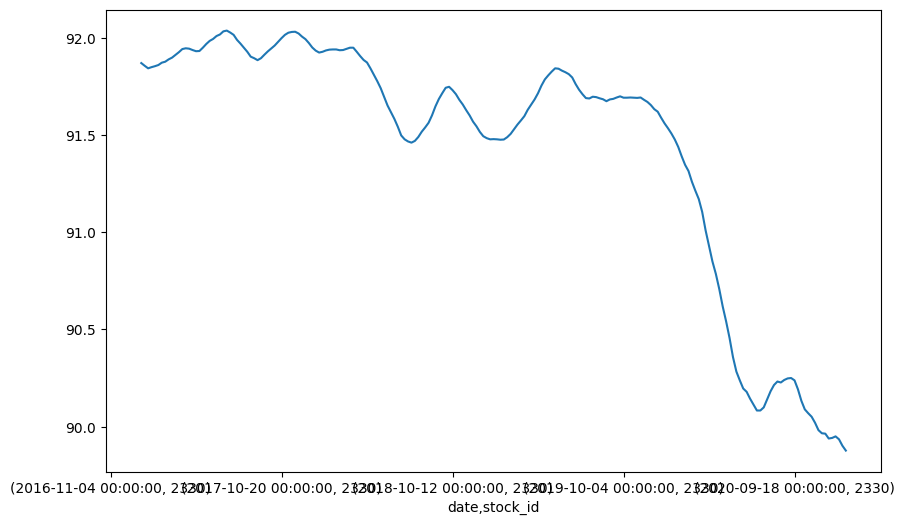

In [84]:
whale_df = modified_inventory[(modified_inventory['持股分級'] == 15)]


# Select rows where 'stock_id' is '2330'
selected_rows = whale_df.loc[(slice(None), '2330', slice(None)), :]
selected_rows
# `slice(None)` is used to include all values for the other levels of the index

# If you only care about the 'stock_id' and are indifferent to the other index levels,
# you could potentially reset the index and perform a boolean mask operation. However,
# using .loc with multi-level indexes is more direct and efficient for this case.

smoothed_whale = selected_rows['占集保庫存數比例'].rolling(10).mean()
smoothed_whale.std()



# Calculate the standard deviation of the smoothed series
std_dev = smoothed_whale.std()

# Calculate the mean of the smoothed series
mean_value = smoothed_whale.mean()

# Define the threshold for filtering
threshold = mean_value - std_dev

# Filter out points where the smoothed_whale series is more than 1 std above the mean
filtered_points = smoothed_whale[smoothed_whale < threshold]


# Plot the smoothed_whale series
smoothed_whale.plot(figsize=(10, 6), label='Smoothed Whale')

# Overlay the filtered_points
# Note: Since filtered_points shares the same index as smoothed_whale, 
# we can directly use it for plotting on the same chart.
plt.scatter(filtered_points.index, filtered_points.values, color='red', label='Filtered Points')

# Adding legend to distinguish the series
plt.legend()

# Show the plot
plt.show()

In [80]:
smoothed_whale

date        stock_id
2016-11-04  2330              NaN
2016-11-11  2330              NaN
2016-11-18  2330              NaN
2016-11-25  2330              NaN
2016-12-02  2330              NaN
                          ...    
2020-12-04  2330        90.077667
2020-12-11  2330        90.074667
2020-12-18  2330        90.068667
2020-12-25  2330        90.061667
2020-12-31  2330        90.053333
Name: 占集保庫存數比例, Length: 216, dtype: float64

In [83]:
filtered_points

Series([], Name: 占集保庫存數比例, dtype: float64)